## 1. Setup and Load Data
#### Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip list

Package                  Version
------------------------ -----------
absl-py                  2.2.2
array_record             0.7.1
asttokens                3.0.0
astunparse               1.6.3
attrs                    25.3.0
beautifulsoup4           4.13.4
bs4                      0.0.2
certifi                  2025.1.31
charset-normalizer       3.4.1
comm                     0.2.2
contourpy                1.3.2
cycler                   0.12.1
debugpy                  1.8.14
decorator                5.2.1
dm-tree                  0.1.9
docstring_parser         0.16
einops                   0.8.1
etils                    1.12.2
executing                2.2.0
flatbuffers              25.2.10
fonttools                4.57.0
fsspec                   2025.3.2
gast                     0.6.0
google-pasta             0.2.0
googleapis-common-protos 1.70.0
grpcio                   1.71.0
h5py                     3.13.0
idna                     3.10
immutabledict            4.2.1
importlib_resou

In [48]:
# Import the required dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import requests
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from dotenv import load_dotenv;

#### Clean the files and folders

In [49]:
#check and print the current Working Directory
wrk_dir = os.getcwd()
print(f"Current working directory is: {wrk_dir}")

Current working directory is: /home/dolaposalim/tensorflow-env/fila/filadentification/scr


In [50]:
cap_dir = r"/home/dolaposalim/tensorflow-env/fila/filadentification/data/cap"

In [5]:
# to delete unwanted files in the directory

for image in os.listdir(cap_dir):
    if image.lower().endswith(".jpg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".jpeg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".png"):
        print(f"image: {image} is in the right format")
    else:
        os.remove(os.path.join(cap_dir, image))
        print(f"deleted non jpg image: {image}")
        
print(f"cleaning completed with {len(os.listdir(cap_dir))} images left in directory")

image: img_233.jpeg is in the right format
image: img_128.jpeg is in the right format
image: img_283.jpeg is in the right format
image: img_216.jpg is in the right format
image: img_124.jpg is in the right format
image: img_225.jpg is in the right format
image: img_271.jpeg is in the right format
image: img_79.jpg is in the right format
image: img_178.jpeg is in the right format
image: img_136.jpeg is in the right format
image: img_240.jpeg is in the right format
image: img_112.jpg is in the right format
image: img_3.jpeg is in the right format
image: img_241.jpeg is in the right format
image: img_107.jpeg is in the right format
image: img_30.jpeg is in the right format
image: img_142.jpeg is in the right format
image: img_239.jpeg is in the right format
image: img_248.jpeg is in the right format
image: img_231.jpg is in the right format
image: img_57.jpg is in the right format
image: img_116.jpeg is in the right format
image: img_21.jpeg is in the right format
image: img_11.jpeg is in

In [51]:
img_folder = cap_dir
print(f"img_folder: {img_folder}")

img_folder: /home/dolaposalim/tensorflow-env/fila/filadentification/data/cap


In [16]:
#remove images with size less than 10KB
for image in os.listdir(img_folder):
    path = f"{img_folder}/{image}"
    if os.path.isfile(path) and os.path.getsize(path) <= 5 * 1024:
        os.remove(path)

print("All images with size less than 10KB have been deleted.")
   

All images with size less than 10KB have been deleted.


In [35]:
# Get a sorted list

image_files = sorted([f for f in os.listdir(img_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Loop and rename
for i, filename in enumerate(image_files):
    ext = os.path.splitext(filename)[1]
    new_name = f"img_{i}{ext}"
    new_path = os.path.join(img_folder, new_name)

    # Skip if target filename already exists
    if os.path.exists(new_path):
        print(f"Skipping {filename}, {new_name} already exists.")
        continue

    os.rename(os.path.join(img_folder, filename), new_path)

print("Safe renaming complete.")


Safe renaming complete.


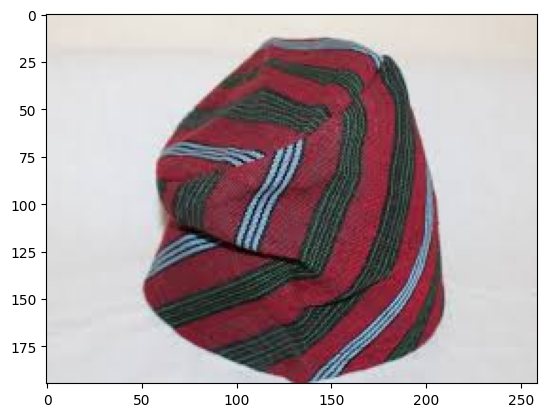

In [52]:
all_images = [f for f in os.listdir(img_folder)
              if os.path.isfile(os.path.join(img_folder, f))]
#BGR - RGB
random_image = random.choice(all_images)
img = cv2.imread(os.path.join(img_folder, random_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

In [53]:
img_rgb.shape

(195, 259, 3)

#### Using API Endpoint for Image Scraping

Step-by-Step Breakdown
🔹 ```load_dotenv()``` and ```os.getenv("PEXELS_API_KEY")```
This part loads your secret Pexels key (like a password) from a hidden file so it stays safe and not visible in your code. That key allows the program to talk to Pexels' website and request images.

🔹 ```save_dir = "/.../data/no-cap"```
This tells the program where on your computer to save the images it will download — in a folder called no-cap.

🔹 ```os.makedirs(save_dir, exist_ok=True)```
If that folder doesn’t already exist, create it.

🔹 The queries = [...] list
This is a list of keywords that describe the kind of images we want, like "nature landscape", "office people", or "library". We’re using random everyday scenes so the model learns what “no-cap” images look like.

🔹 ```headers = {"Authorization": PEXELS_API_KEY}```
This is like saying, "Hi Pexels, here’s my key — can I have some pictures please?"

🔹 The loop: ```while count < 236```
This part runs again and again, collecting more images until we get to 250.

In [14]:
load_dotenv()
PEXELS_API_KEY = os.getenv("PEXELS_API_KEY")
save_dir = "/home/dolaposalim/tensorflow-env/fila/filadentification/data/no-cap"
os.makedirs(save_dir, exist_ok=True)

queries = [
    "nature landscape", "office people", "technology", "home interior",
    "street photography", "animals", "kitchen", "library",
    "people walking", "parks and city"
]

headers = {
    "Authorization": PEXELS_API_KEY
}

count = 0
page = 1
while count < 236:
    query = random.choice(queries)
    print(f"Fetching images for query: {query} (Page {page})")

    response = requests.get(
        "https://api.pexels.com/v1/search",
        headers=headers,
        params={"query": query, "per_page": 30, "page": page}
    )

    data = response.json()
    photos = data.get("photos", [])
    if not photos:
        print("No more photos found for query:", query)
        page = 1
        continue

    for photo in photos:
        img_url = photo["src"]["medium"]
        try:
            img_data = requests.get(img_url).content
            with open(os.path.join(save_dir, f"no_cap_{count}.jpg"), "wb") as f:
                f.write(img_data)
            count += 1
            if count >= 250:
                break
        except Exception as e:
            print(f"Error downloading image: {e}")
    page += 1

print(f"Downloaded {count} no-cap images to: {save_dir}")


Fetching images for query: people walking (Page 1)
Fetching images for query: people walking (Page 2)
Fetching images for query: people walking (Page 3)
Fetching images for query: street photography (Page 4)
Fetching images for query: parks and city (Page 5)
Fetching images for query: street photography (Page 6)
Fetching images for query: nature landscape (Page 7)
Fetching images for query: library (Page 8)
Downloaded 240 no-cap images to: /home/dolaposalim/tensorflow-env/fila/filadentification/data/no-cap


#### Load our data

``` tf.keras.utils.image_dataset_from_directory```
###### Load images from folders	image_dataset_from_directory(): Auto-labels, resizes, batches, and shuffles your image data from disk
- Automatically reads images from a directory with subfolders as class labels
- Converts them into a TensorFlow dataset
- Automatically resizes, batches, and labels them
- Works well with model.fit(), ready to train a model


In [55]:
data_dir = r"/home/dolaposalim/tensorflow-env/fila/filadentification/data"
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=4, image_size=(64, 64), shuffle=True)

Found 526 files belonging to 2 classes.


###### to ensure consistent image size, the ```image_dataset_from_directory``` function helps to resize the images and batch them

In [56]:
data_iterator = data.as_numpy_iterator() #Loop through the dataset

In [57]:
batch = data_iterator.next() #Access batch of data

In [58]:
batch

(array([[[[228.      , 224.      , 215.      ],
          [228.      , 224.      , 215.      ],
          [229.      , 225.      , 216.      ],
          ...,
          [228.      , 223.      , 217.      ],
          [228.      , 223.      , 217.      ],
          [228.      , 223.      , 217.      ]],
 
         [[228.      , 224.      , 215.      ],
          [228.      , 224.      , 215.      ],
          [229.      , 225.      , 216.      ],
          ...,
          [228.      , 223.      , 217.      ],
          [228.      , 223.      , 217.      ],
          [228.      , 223.      , 217.      ]],
 
         [[228.      , 224.      , 215.      ],
          [228.      , 224.      , 215.      ],
          [227.51562 , 223.51562 , 214.51562 ],
          ...,
          [228.74219 , 223.74219 , 217.74219 ],
          [228.      , 223.      , 217.      ],
          [227.25781 , 222.25781 , 216.25781 ]],
 
         ...,
 
         [[206.      , 206.      , 208.      ],
          [206.   

In [59]:
len(batch) 

2

In [60]:
batch[0]

array([[[[228.      , 224.      , 215.      ],
         [228.      , 224.      , 215.      ],
         [229.      , 225.      , 216.      ],
         ...,
         [228.      , 223.      , 217.      ],
         [228.      , 223.      , 217.      ],
         [228.      , 223.      , 217.      ]],

        [[228.      , 224.      , 215.      ],
         [228.      , 224.      , 215.      ],
         [229.      , 225.      , 216.      ],
         ...,
         [228.      , 223.      , 217.      ],
         [228.      , 223.      , 217.      ],
         [228.      , 223.      , 217.      ]],

        [[228.      , 224.      , 215.      ],
         [228.      , 224.      , 215.      ],
         [227.51562 , 223.51562 , 214.51562 ],
         ...,
         [228.74219 , 223.74219 , 217.74219 ],
         [228.      , 223.      , 217.      ],
         [227.25781 , 222.25781 , 216.25781 ]],

        ...,

        [[206.      , 206.      , 208.      ],
         [206.      , 206.      , 208.      ]

In [61]:
# Get another batch from the iterator
batch = data_iterator.next() 

In [62]:
# images in numpy array
batch[0].shape

(4, 64, 64, 3)

In [63]:
batch[1] # labels in numpy array

# class 0 = cap
# class 1 = no-cap

array([0, 1, 1, 1], dtype=int32)

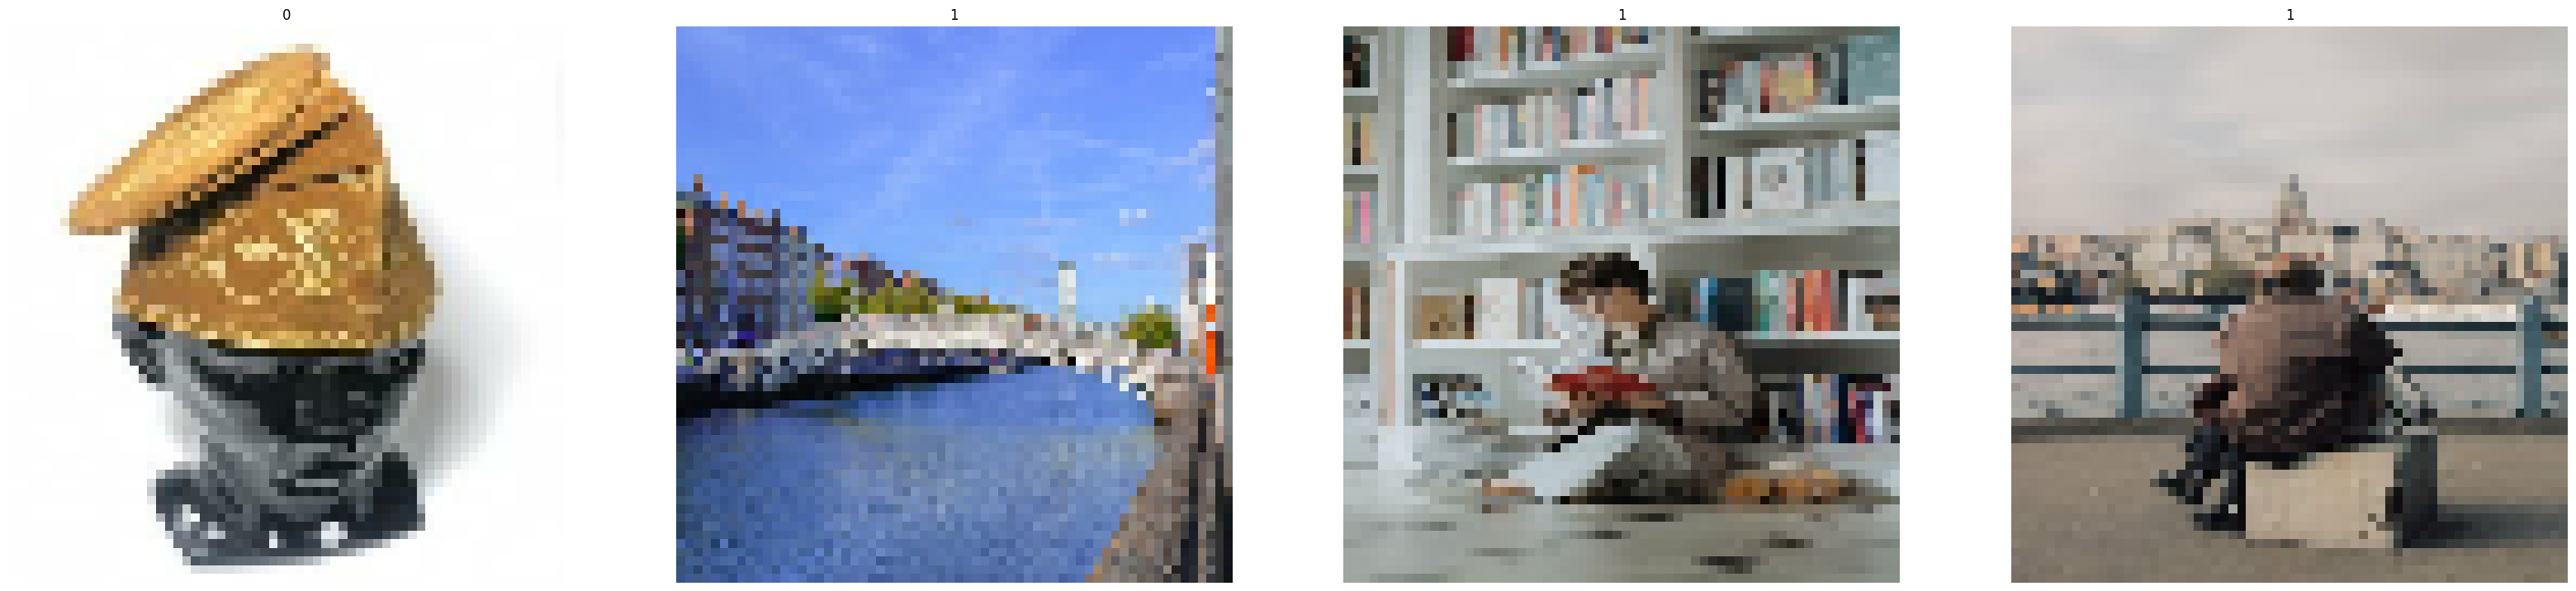

In [64]:
# Visualise some data/images
fig, ax = plt.subplots(ncols=4, figsize=(40, 40))
for i in range(4):
    ax[i].imshow(batch[0][i].astype("uint8"))
    ax[i].set_title(batch[1][i])
    ax[i].axis("off")

### 2. Preprocess our Data

In [65]:
scaled_batch = batch[0] / 255.0
scaled_batch.max()

np.float32(1.0)

##### 2.1 Scale Data

In [66]:
data = data.map(lambda x, y: (x / 255.0, y)) 
# x are images, y are labels

In [67]:
data.as_numpy_iterator().next()[0].min()

np.float32(0.0)

#### Split Data

In [68]:
len(data) # 66 batches of 8 images each

132

In [71]:
66*.1

6.6000000000000005

In [72]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)+1

In [73]:
train_size + val_size + test_size

132

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [75]:
len(train), len(val), len(test)

(92, 26, 14)

```
# ✅ Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# ✅ Build the model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# ✅ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)
```

In [76]:
# Prefetch for performance
train = train.prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.prefetch(buffer_size=tf.data.AUTOTUNE)

In [77]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [83]:
model = Sequential([
    Input(shape=(64, 64, 3)),  # Define input shape here
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [85]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

- ```adam```: adaptive learning rate optimizer
- ```binary_crossentropy```: for binary classification
- ```accuracy```: to monitor performance

##### Train the Model

In [86]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6639 - loss: 0.6165 - val_accuracy: 0.7788 - val_loss: 0.5361
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8252 - loss: 0.4436 - val_accuracy: 0.7981 - val_loss: 0.4610
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8260 - loss: 0.3887 - val_accuracy: 0.7500 - val_loss: 0.4783
Epoch 4/10
 4/92 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9479 - loss: 0.1205

: 